In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ri = pd.read_csv('C:\\Users\\adishree.b\\Desktop\\Adishree.B_python\\better or worse\\police.csv')
ted = pd.read_csv('C:\\Users\\adishree.b\\Desktop\\Adishree.B_python\\better or worse\\ted.csv')

In [3]:
ri.drop('county_name', axis = 'columns', inplace = True) 

In [4]:
# Which year had the least number of stops
# we need the year from the date

In [5]:
# there are many ways, ne is the str function called slice(from index, number of characters)

In [6]:
ri['stop_year'] = ri.stop_date.str.slice(0,4)

In [7]:
ri.stop_year

0        2005
1        2005
2        2005
3        2005
4        2005
5        2005
6        2005
7        2005
8        2005
9        2005
10       2005
11       2005
12       2005
13       2005
14       2005
15       2005
16       2005
17       2005
18       2005
19       2005
20       2005
21       2005
22       2005
23       2005
24       2005
25       2005
26       2005
27       2005
28       2005
29       2005
         ... 
91711    2015
91712    2015
91713    2015
91714    2015
91715    2015
91716    2015
91717    2015
91718    2015
91719    2015
91720    2015
91721    2015
91722    2015
91723    2015
91724    2015
91725    2015
91726    2015
91727    2015
91728    2015
91729    2015
91730    2015
91731    2015
91732    2015
91733    2015
91734    2015
91735    2015
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_year, Length: 91741, dtype: object

In [8]:
ri.stop_year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_year, dtype: int64

In [9]:
# next way is to combine the date and time into a datetime format, and extract year from datetime function
# x = df.date.str.cat(df.time,'separator') to concat
# then pd.to_datetime(datetime_obj) to convert the object to datetime
# then use dt function as df.datetime_obj.dt.year to extract year
# can use weekday or month in the dt function

In [10]:
combined = ri.stop_date.str.cat(ri.stop_time,' ')

In [11]:
ri['stop_datetime'] = pd.to_datetime(combined)

In [12]:
# let's check the datatype of the datetime
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
stop_year                     object
stop_datetime         datetime64[ns]
dtype: object

In [13]:
ri['stop_year_dt'] = ri.stop_datetime.dt.year

In [14]:
ri.stop_year_dt.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_year_dt, dtype: int64

In [15]:
# We got the same result with str and dt function.
# the value_counts function sorts by desc order by default
# to sort in the asc order, we can use sort_values function

In [16]:
ri.stop_year_dt.value_counts().sort_values().index[0]

2005

In [17]:
# We can use index[] to find the index value of a resulting list or df

In [18]:
### Lessons
# Consider removing chunks of data that may be biased
# Use the datetime date typefor dates and times

In [19]:
## How does  drug activity change by time of day?
## useful variables are stop_datetime and drug_related_stops
## interpretation - for each hour what is the rate of drug_related search?

In [20]:
# Let's look at the general rate of drug search being held
ri.drugs_related_stop.mean()

0.008883705213590434

In [21]:
ri['stop_hour'] = ri.stop_datetime.dt.hour

In [22]:
ri[ri.drugs_related_stop == True].stop_hour.value_counts()

0     103
23     92
1      60
13     50
22     47
2      46
14     44
9      43
10     42
11     41
15     31
19     30
20     27
16     22
18     22
3      20
21     20
12     16
17     16
7      15
8      14
6      10
4       3
5       1
Name: stop_hour, dtype: int64

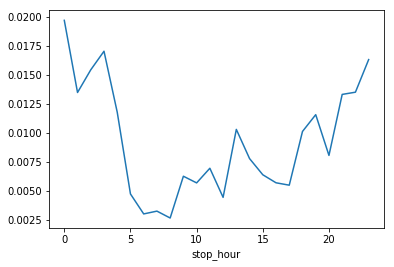

In [23]:
ri.groupby(ri.stop_hour).drugs_related_stop.mean().plot()

In [24]:
# Default plot for the pandas is line plot
# Without Jupyter, you have to use plt.show

In [25]:
### Lessons

# Use plots to help you understand trends
# Create exploratory plots using pandas one liners

In [26]:
ri[ri.drugs_related_stop == True].groupby(ri.stop_hour).drugs_related_stop.value_counts()
# You can use df[df.col=value] to extract the df with that conditions on the rows

stop_hour  drugs_related_stop
0          True                  103
1          True                   60
2          True                   46
3          True                   20
4          True                    3
5          True                    1
6          True                   10
7          True                   15
8          True                   14
9          True                   43
10         True                   42
11         True                   41
12         True                   16
13         True                   50
14         True                   44
15         True                   31
16         True                   22
17         True                   16
18         True                   22
19         True                   30
20         True                   27
21         True                   20
22         True                   47
23         True                   92
Name: drugs_related_stop, dtype: int64

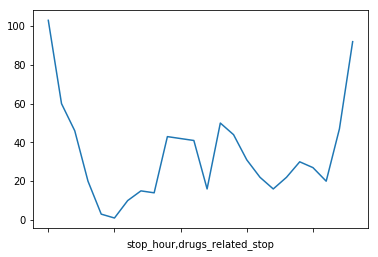

In [27]:
ri[ri.drugs_related_stop == True].groupby(ri.stop_hour).drugs_related_stop.value_counts().plot()

In [28]:
## Now the value counts is alsso giving the same output in the plot as the mean function 
# after putting the drug stop = True function

In [29]:
### Do most stops occur at night?

# First separate the night and day from the datetime or the hour column created.
# Then groupby the counts or mean of stops or create a plot

In [30]:
ri[(ri.stop_hour > 20) & (ri.stop_hour < 4)].shape

(0, 18)

In [31]:
ri.stop_hour

0         1
1         8
2        23
3        17
4        10
5         9
6        17
7        13
8        10
9        15
10       16
11       19
12       19
13       19
14       19
15        0
16        0
17       23
18        0
19       20
20       12
21       16
22        2
23       10
24        1
25       16
26       10
27       13
28       22
29        1
         ..
91711    15
91712    16
91713    17
91714    17
91715    23
91716    23
91717     0
91718     0
91719     6
91720     6
91721     6
91722     7
91723     7
91724     7
91725     8
91726     8
91727     9
91728    13
91729    14
91730    15
91731    16
91732    19
91733    19
91734    20
91735    20
91736    20
91737    20
91738    20
91739    21
91740    22
Name: stop_hour, Length: 91741, dtype: int64

In [32]:
ri.stop_hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_hour, dtype: int64

In [33]:
# this is just giving us the unsorted dispersion of search conducted results with time
# we can sort the result by index or the values by applying sort function in pandas

In [34]:
ri.stop_hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_hour, dtype: int64

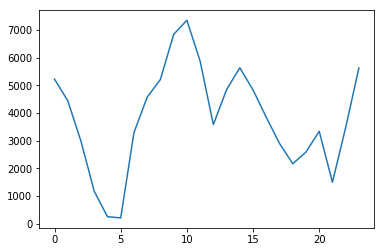

In [35]:
ri.stop_hour.value_counts().sort_index().plot()


In [ ]:
### Find the bad data in the stop duration column and fix it

In [39]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [43]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
1                1
2                1
Name: stop_duration, dtype: int64

In [45]:
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN' 

C:\Users\adishree.b\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [52]:
## Since 
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'),'stop_duration'] = 'NaN' 

In [53]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [54]:
ri.stop_duration.value_counts(dropna = False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [59]:
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'),'stop_duration'].value_counts()

Series([], Name: stop_duration, dtype: int64)

In [60]:
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration.value_counts()

Series([], Name: stop_duration, dtype: int64)